Q1

In [38]:
import torch
import torch.nn.functional as F
image = torch.rand(6,6)
print("image=", image)
#Add a new dimension along 0th dimension
#i.e. (6,6) becomes (1,6,6). This is because
#pytorch expects the input to conv2D as 4d tensor
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
print("image=", image)
kernel = torch.ones(3,3)
#kernel = torch.rand(3,3)
print("kernel=", kernel)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)
print("kernel size",kernel.shape)
#Perform the convolution
outimage = F.conv2d(image, kernel, stride=1, padding=0)
print("outimage=", outimage.shape)

image= tensor([[0.7761, 0.5746, 0.4965, 0.4540, 0.2030, 0.5472],
        [0.9234, 0.0995, 0.8705, 0.3629, 0.6596, 0.6208],
        [0.8230, 0.6091, 0.1607, 0.3446, 0.9557, 0.9892],
        [0.8359, 0.1438, 0.2813, 0.2297, 0.3188, 0.6237],
        [0.3954, 0.1712, 0.2542, 0.2636, 0.6073, 0.9864],
        [0.7626, 0.5949, 0.3403, 0.0079, 0.2547, 0.3905]])
image.shape= torch.Size([1, 6, 6])
image.shape= torch.Size([1, 1, 6, 6])
image= tensor([[[[0.7761, 0.5746, 0.4965, 0.4540, 0.2030, 0.5472],
          [0.9234, 0.0995, 0.8705, 0.3629, 0.6596, 0.6208],
          [0.8230, 0.6091, 0.1607, 0.3446, 0.9557, 0.9892],
          [0.8359, 0.1438, 0.2813, 0.2297, 0.3188, 0.6237],
          [0.3954, 0.1712, 0.2542, 0.2636, 0.6073, 0.9864],
          [0.7626, 0.5949, 0.3403, 0.0079, 0.2547, 0.3905]]]])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
kernel size torch.Size([1, 1, 3, 3])
outimage= torch.Size([1, 1, 4, 4])


In [17]:
outimage2 = F.conv2d(image, kernel, stride=2, padding=0)
print("outimage 2 size=", outimage2.shape)
outimage3 = F.conv2d(image, kernel, stride=3, padding=0)
print("outimage 3 size=", outimage3.shape)
outimage4 = F.conv2d(image, kernel, stride=4, padding=0)
print("outimage 4 =", outimage4.shape)

outimage 2 size= torch.Size([1, 1, 2, 2])
outimage 3 size= torch.Size([1, 1, 2, 2])
outimage 4 = torch.Size([1, 1, 1, 1])


In [18]:
outimage2 = F.conv2d(image, kernel, stride=1, padding=1)
print("outimage 2 size=", outimage2.shape)
outimage3 = F.conv2d(image, kernel, stride=1, padding=2)
print("outimage 3 size=", outimage3.shape)
outimage4 = F.conv2d(image, kernel, stride=1, padding=3)
print("outimage 4 size=", outimage4.shape)

outimage 2 size= torch.Size([1, 1, 6, 6])
outimage 3 size= torch.Size([1, 1, 8, 8])
outimage 4 size= torch.Size([1, 1, 10, 10])


Q2

In [37]:
image = torch.rand(6,6)
#Add a new dimension along 0th dimension
#i.e. (6,6) becomes (1,6,6). This is because
#pytorch expects the input to conv2D as 4d tensor
image = image.unsqueeze(dim=0)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
filters = torch.randn(3, 1, 3, 3)
out = F.conv2d(image, filters, padding=0)
print("outimage for functional conv2d=", out.shape)
out = torch.nn.Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
print("outimage size for nn.conv2d=", out(image).shape)

image.shape= torch.Size([1, 1, 6, 6])
outimage for functional conv2d= torch.Size([1, 3, 4, 4])
outimage size for nn.conv2d= torch.Size([1, 3, 4, 4])


Q3 & Q4

In [39]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import torchvision
import torchvision.transforms as transforms

In [40]:
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [41]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [42]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,128,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(64,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))

In [43]:
# Import MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [44]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [45]:
model = CNN().to(device)

In [46]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [47]:
# Train the model
def trainModel(model, num_epochs,train_loader,optimizer):
    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # origin shape: [100, 1, 28, 28]
            # resized: [100, 784]
            # images = images.reshape(-1, 28*28).to(device)
            images = images.to(device)
            labels = labels.to(device)
    
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
    
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

In [48]:
trainModel(model,1, train_loader, optimizer)

/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1702400440653/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [1/1], Step [100/600], Loss: 0.2862
Epoch [1/1], Step [200/600], Loss: 0.3403
Epoch [1/1], Step [300/600], Loss: 0.2120
Epoch [1/1], Step [400/600], Loss: 0.0827
Epoch [1/1], Step [500/600], Loss: 0.1701
Epoch [1/1], Step [600/600], Loss: 0.2042


In [50]:
class CNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(32,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(32,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))
class CNN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,16,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(16,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(32,16,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(16,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))
class CNN4(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,64,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,128,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,256,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(256,128,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,64,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(64,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))

In [51]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as cdm
def test(model, test_loader):
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  
    return correct/total

In [53]:
m1 = CNN().to(device)
m2 = CNN2().to(device)
m3 = CNN3().to(device)
m4 = CNN4().to(device)

o1 = torch.optim.Adam(m1.parameters(), lr=learning_rate)
o2 = torch.optim.Adam(m2.parameters(), lr=learning_rate)
o3 = torch.optim.Adam(m3.parameters(), lr=learning_rate)
o4 = torch.optim.Adam(m4.parameters(), lr=learning_rate)
#trainModel(m1,2, train_loader, o1)
trainModel(m2,2, train_loader, o2)
trainModel(m3,2, train_loader, o3)
trainModel(m4,2, train_loader, o4)

Epoch [1/2], Step [100/600], Loss: 0.3630
Epoch [1/2], Step [200/600], Loss: 0.2628
Epoch [1/2], Step [300/600], Loss: 0.2032
Epoch [1/2], Step [400/600], Loss: 0.2468
Epoch [1/2], Step [500/600], Loss: 0.1985
Epoch [1/2], Step [600/600], Loss: 0.2008
Epoch [2/2], Step [100/600], Loss: 0.1065
Epoch [2/2], Step [200/600], Loss: 0.1316
Epoch [2/2], Step [300/600], Loss: 0.1374
Epoch [2/2], Step [400/600], Loss: 0.0786
Epoch [2/2], Step [500/600], Loss: 0.1232
Epoch [2/2], Step [600/600], Loss: 0.0668
Epoch [1/2], Step [100/600], Loss: 1.0370
Epoch [1/2], Step [200/600], Loss: 0.5967
Epoch [1/2], Step [300/600], Loss: 0.4454
Epoch [1/2], Step [400/600], Loss: 0.3708
Epoch [1/2], Step [500/600], Loss: 0.2206
Epoch [1/2], Step [600/600], Loss: 0.2015
Epoch [2/2], Step [100/600], Loss: 0.2083
Epoch [2/2], Step [200/600], Loss: 0.2132
Epoch [2/2], Step [300/600], Loss: 0.2109
Epoch [2/2], Step [400/600], Loss: 0.1633
Epoch [2/2], Step [500/600], Loss: 0.3045
Epoch [2/2], Step [600/600], Loss:

In [54]:
m2a = test(m2,test_loader)
m3a = test(m3,test_loader)
m4a = test(m4,test_loader)
m1a = test(model,test_loader)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
m2p = count_parameters(m2)
m3p = count_parameters(m3)
m4p = count_parameters(m4)
m1p = count_parameters(model)
import numpy as np
x = [m1p,m1p-m2p,m1p-m3p,m4p-m1p]

In [55]:
x = np.array(x)
x / m1p * 100

array([100.        ,  74.53237026,  93.34170016, 394.00259015])

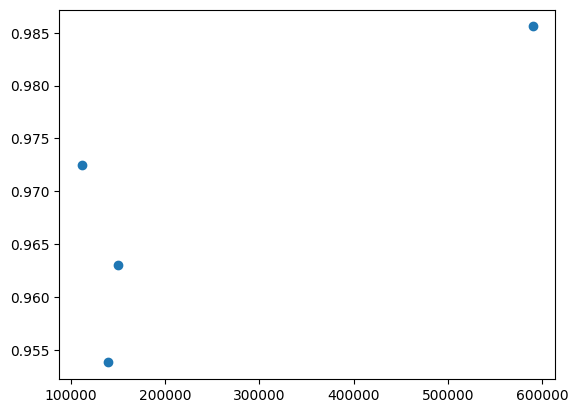

In [56]:
y = np.array([m1a, m2a, m3a, m4a])
plt.scatter(x,y)

In [57]:
x

array([149798, 111648, 139824, 590208])

In [58]:
y

array([0.963 , 0.9725, 0.9538, 0.9856])